# Milestone 1

Dataset Link: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv

For this project, I aim to create a model that will predict the overall health of a person based upon the level of care they provide to another individual. I will examine the effects being a caregiver plays into a person’s health. A caregiver is defined as a person, often a family member, who regularly looks after another sick, elderly, or disabled person. Many times, caregivers are unprepared for the burden of care they take on, and as such, their health suffers. Caregiving often includes the caregiver sacrificing large amounts of time during their day to provide for their recipient, foregoing time previously used to look after themselves.  The CDC (CDC, 2018) reports that caregiving is an overlooked public health issue affecting millions of individuals. While caregiving can bring great satisfaction to the caregiver, it can also negatively affect their physical and mental health. 

It is important to understand the relationship between the degree of caregiving provided and the health of the caregiver. Understanding this relationship will allow for better resources and help to be provided to the caregiver. 

The data used for this project was aggregated by the Behavior Risk Factor Surveillance System in 2015. The dataset contains 330 unique columns as they pertain to the individual answering. The 2015 data set was specifically chosen over more recent datasets, such as the 2020 or 2021, as it contained over 20,000 data points related to Caregivers versus the 5,000 contained within the 2020/2021 datasets. 

The first target from this dataset is the General Health variable, or GENHLTH. This question required respondents to the survey to provide their overall assessment of their health, from Excellent to Poor. 

The second target from this dataset is the Mental Health variable, or MENTHLTH. This question required respondents to the survey to provide the number of days over the past 30 days in which they felt depressed, stressed, or had problems with emotions. 

The third and final target from this dataset is the Physical Health variable, or PHYSHLTH. This question required respondents to the survey to provide the number of days over the past 30 days in which they felt their physical health was not good, to include physical illness or injury. 


Citations:
https://www.cdc.gov/aging/caregiving/caregiver-brief.html



### Examing the Data

In [1]:
# importing the standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset into a DataFrame
m1 = pd.read_csv(r"C:\Users\eadam\Desktop\DSC 550\Homework\Week 6\2015.csv")

In [3]:
# checking for a quick df summary
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


I have 330 columns. I'll need to check for duplicates and/or variables that I don't need for my analysis. I will be using the 2015 BRFSS Codebook to determine the meaning for each column/variable and will rule out varaibles that do not make sense for this project.

**BRFSS Codebook**: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [4]:
# settiung pd option to display total ouput
pd.set_option("display.max_rows", None)

In [5]:
# dropping unneeded columns 

m2 = m1.drop(['IDATE','IMONTH','IDAY','IYEAR',
             'DISPCODE','SEQNO','_PSU','CTELENUM',
             'PVTRESD1','COLGHOUS','STATERES',
             'CELLFON3','LADULT','NUMADULT',
             'NUMMEN','NUMWOMEN','CTELNUM1',
             'CELLFON2','CADULT','PVTRESD2',
             'CCLGHOUS','CSTATE','LANDLINE',
             'HHADULT','CHECKUP1','BLOODCHO',
             'BPMEDS','CHOLCHK','ASTHNOW',
             'DIABAGE2','EDUCA','RENTHOM1',
             'NUMHHOL2','NUMPHON2','CPDEMO1',
             'CHILDREN','INTERNET','SMOKE100',
             'STOPSMK2','LASTSMK2','USENOW3',
             'AVEDRNK2','DRNK3GE5',
             'MAXDRNKS','FRUITJU1','FRUIT1',
             'FVBEANS','FVGREEN','FVORANG',
             'VEGETAB1','EXRACT11','EXEROFT1',
             'EXRACT21','EXERHMM1','ARTHDIS2',
             'ARTHSOCL','JOINPAIN','SEATBELT',
             'FLUSHOT6','FLSHTMY2','IMFVPLAC',
             'PNEUVAC3','HIVTST6','HIVTSTD3',
             'WHRTST10','PDIABTST','BLDSUGAR',
             'FEETCHK2','CHKHEMO3','FEETCHK',
             'EYEEXAM','DIABEYE','DIABEDU',
             'PAINACT2','QLMENTL2','QLSTRES2',
             'QLHLTH2','CRGVEXPT','VIDFCLT2',
             'VIREDIF3','VIPRFVS2','VINOCRE2',
             'VIEYEXM2','VIINSUR2','VICTRCT4',
             'VIGLUMA2','CDHELP','CDSOCIAL',
             'CDDISCUS','WTCHSALT','LONGWTCH',
             'ASTHMAGE','ASERVIST','ASDRVIST',
             'ASRCHKUP','ASACTLIM','ASYMPTOM',
             'ASNOSLEP','ASTHMED3','ASINHALR',
             'HAREHAB1','STREHAB1','CVDASPRN',
             'ASPUNSAF','RLIVPAIN','RDUCHART',
             'RDUCSTRK','ARTTODAY','ARTHWGT',
             'ARTHEXER','ARTHEDU','TETANUS',
             'HPVADVC2','HPVADSHT','SHINGLE2',
             'HADMAM','HOWLONG','HADPAP2',
             'LASTPAP2','HPVTEST','HPLSTTST',
             'HADHYST2','PROFEXAM','LENGEXAM',
             'BLDSTOOL','LSTBLDS3','HADSIGM3',
             'HADSGCO1','LASTSIG3','PCPSAAD2',
             'PCPSADI1','PCPSARE1','PSATEST1',
             'PSATIME','PCPSARS1','PCPSADE1',
             'PCDMDECN','SCNTMNY1','SCNTMEL1',
             'SCNTPAID','SCNTWRK1','SCNTLPAD',
             'SCNTLWK1','SXORIENT','TRNSGNDR',
             'RCSGENDR','RCSRLTN2','CASTHDX2',
             'CASTHNO2','ADPLEASR','ADDOWN',
             'ADSLEEP','ADENERGY','ADEAT1',
             'ADFAIL','ADTHINK','ADMOVE',
             'MISTMNT','QSTVER','QSTLANG',
             'EXACTOT1','EXACTOT2','MSCODE',
             '_STSTR','_STRWT','_RAWRAKE',
             '_WT2RAKE','_CHISPNC','_CRACE1',
             '_CPRACE','_CLLCPWT','_DUALUSE',
             '_DUALCOR','_LLCPWT','_RFHLTH',
             '_HCVU651','_RFHYPE5','_CHOLCHK',
             '_RFCHOL','_MICHD','_LTASTH1',
             '_CASTHM1','_ASTHMS1','_DRDXAR1',
             '_MRACE1','_HISPANC','_RACE',
             '_RACEG21','_RACEGR3','_RACE_G1',
             '_AGE65YR','_AGE80','_AGE_G',
             'HTIN4','HTM4','WTKG3','_BMI5',
             '_BMI5CAT','_RFBMI5','_CHLDCNT',
             '_EDUCAG','_INCOMG','_SMOKER3',
             '_RFSMOK3','DRNKANY5','DROCDY3_',
             '_RFBING5','_DRNKWEK','_RFDRHV5',
             'FTJUDA1_','FRUTDA1_','BEANDAY_',
             'GRENDAY_','ORNGDAY_','VEGEDA1_',
             '_MISFRTN','_MISVEGN','_FRTRESP',
             '_VEGRESP','_FRUTSUM','_VEGESUM',
             '_FRTLT1','_VEGLT1','_FRT16',
             '_VEG23','_FRUITEX','_VEGETEX',
             '_TOTINDA','METVL11_','METVL21_',
             'MAXVO2_','FC60_','ACTIN11_',
             'ACTIN21_','PADUR1_','PADUR2_',
             'PAFREQ1_','PAFREQ2_','_MINAC11',
             '_MINAC21','STRFREQ_','PAMISS1_',
             'PAMIN11_','PAMIN21_','PA1MIN_',
             'PAVIG11_','PAVIG21_','PA1VIGM_',
             '_PACAT1','_PAINDX1','_PA150R2',
             '_PA300R2','_PA30021','_PASTRNG',
             '_PAREC1','_PASTAE1','_LMTACT1',
             '_LMTWRK1','_LMTSCL1','_RFSEAT2',
             '_RFSEAT3','_FLSHOT6','_PNEUMO2',
             '_AIDTST3','CRGVREL1', '_STATE',
             'CRGVPRB1','CRGVPERS', 'FMONTH',
             'CRGVHOUS','CRGVMST2', 'LMTJOIN3',
             'PREDIAB1', 'INSULIN', 'DOCTDIAB',
             'VIMACDG2', 'CIMEMLOS', 'HLTHPLN1',
             'CDHOUSE', 'CDASSIST', 'DRADVISE',
             'ASATTACK', 'EMTSUPRT', 'LSATISFY',
             'ADANXEV', 'TOLDHI2', 'PREGNANT',
             'SMOKDAY2', 'EXERANY2', 'EXEROFT2',
             'EXERHMM2', 'PERSDOC2', 'MEDCOST',
             'MARITAL', 'HEIGHT3', 'WEIGHT2',
             'BLIND', 'STRENGTH'], axis=1, inplace=False)

# 'VETERAN3', 'EMPLOY1','INCOME2',

In [6]:
# checking which columns have null values
m2.isnull().sum()

GENHLTH          2
PHYSHLTH         1
MENTHLTH         0
POORHLTH    214492
BPHIGH4          1
CVDINFR4         0
CVDCRHD4         1
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         1
CHCOCNCR         0
CHCCOPD1         0
HAVARTH3         1
ADDEPEV2         0
CHCKIDNY         0
DIABETE3         7
SEX              0
VETERAN3         6
EMPLOY1          0
INCOME2       3301
QLACTLM2      9338
USEEQUIP     10430
DECIDE       11740
DIFFWALK     12334
DIFFDRES     12728
DIFFALON     13326
ALCDAY5      15931
CAREGIV1    332461
CRGVLNG1    417461
CRGVHRS1    417493
_PRACE1          0
_AGEG5YR         0
dtype: int64

In [7]:
# dropping all null values from the dataset

m3 = m2.dropna(axis=0)

In [8]:
# checking for null values in the new dataset

m3.isnull().sum()

GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
POORHLTH    0
BPHIGH4     0
CVDINFR4    0
CVDCRHD4    0
CVDSTRK3    0
ASTHMA3     0
CHCSCNCR    0
CHCOCNCR    0
CHCCOPD1    0
HAVARTH3    0
ADDEPEV2    0
CHCKIDNY    0
DIABETE3    0
SEX         0
VETERAN3    0
EMPLOY1     0
INCOME2     0
QLACTLM2    0
USEEQUIP    0
DECIDE      0
DIFFWALK    0
DIFFDRES    0
DIFFALON    0
ALCDAY5     0
CAREGIV1    0
CRGVLNG1    0
CRGVHRS1    0
_PRACE1     0
_AGEG5YR    0
dtype: int64

In [9]:
# checking to see what values are in the Caregiver Column

m3['CAREGIV1'].unique()

array([1.])

Dropping all null values, to include the values in CRGVLNG1 and CRGVHRS1 ensured that the only response to the CAREGIV1 column was 1.0. This response indicates that the interviewee is a caregiver. I want to first examine the differences in health between caregivers and non-caregivers, so I will create another dataset that includes the 2.0, or Not a Caregiver response. 

In [10]:
# creating a dataset that removes null responses only in the CAREGIV1 set

m6 = m2.dropna(axis=0, subset=['CAREGIV1'])

In [11]:
m6 = m6.dropna(axis=0, subset=['POORHLTH'])

In [12]:
# the BRFSS codebook reports the responses to the CAREGIV1 column
# 7, 8, & 9 (Don't Know, Caregiving Recipient Died, & Refused, respectively)
# are not needed for this examination

m6 = m6.drop(m6[(m6['CAREGIV1']==7) | (m6['CAREGIV1']==8) | (m6['CAREGIV1']==9)].index)

In [13]:
# ensuring the only the desired responses are left 

m6['CAREGIV1'].unique()

array([2., 1.])

In [14]:
m6['CAREGIV1'].value_counts()

2.0    42597
1.0    14025
Name: CAREGIV1, dtype: int64

### Correlation Matrix

In [15]:
corr = m6.corr()

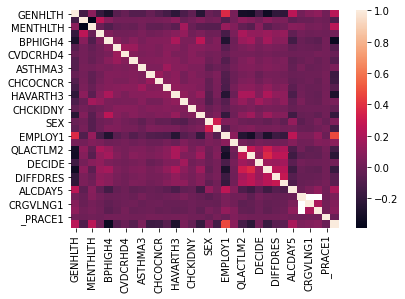

In [16]:
# trying to see at a quick glance, any correlations

sns.heatmap(m6.corr(), annot=False)
plt.show()

In [17]:
# I want specific details on the correlation
# I perform the matrix in this style to get more in-depth

corr.style.background_gradient(cmap='coolwarm')

,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,BPHIGH4,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,SEX,VETERAN3,EMPLOY1,INCOME2,QLACTLM2,USEEQUIP,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,ALCDAY5,CAREGIV1,CRGVLNG1,CRGVHRS1,_PRACE1,_AGEG5YR
GENHLTH,1.000000,-0.142855,0.091725,-0.197273,-0.286798,-0.070998,-0.018711,-0.080555,-0.078394,-0.022408,-0.078446,-0.135017,-0.216774,-0.110292,-0.043564,-0.238175,-0.012672,-0.047994,0.372185,0.030246,-0.306104,-0.320424,-0.152625,-0.328475,-0.203876,-0.217173,0.251936,0.019773,0.077337,0.110107,0.018185,0.243698
PHYSHLTH,-0.142855,1.000000,-0.387043,0.253043,0.089499,0.021125,0.019460,0.021410,0.030651,0.022485,0.033209,0.044683,0.096023,-0.008662,0.020705,0.063534,0.018745,0.032982,-0.089631,0.022236,0.110747,0.076504,0.025799,0.097212,0.041378,0.048886,-0.046633,-0.013738,-0.007921,0.016073,-0.000635,-0.097567
MENTHLTH,0.091725,-0.387043,1.000000,-0.012023,-0.094206,-0.028073,-0.011338,-0.020556,0.022840,-0.038637,-0.043777,-0.017957,-0.059630,0.173027,-0.008794,-0.063121,-0.074188,-0.074359,0.130269,0.067679,-0.029463,-0.071789,0.086475,-0.052473,-0.005172,0.010999,0.086473,0.073642,0.025094,0.039771,0.019226,0.246156
POORHLTH,-0.197273,0.253043,-0.012023,1.000000,0.060007,0.016240,0.014736,0.022130,0.050546,0.014782,0.029799,0.055482,0.086527,0.127150,0.015692,0.046679,0.000137,0.007904,-0.122168,0.045162,0.193662,0.127646,0.112047,0.147207,0.109138,0.127948,-0.035947,0.023716,-0.002083,0.012894,0.003733,0.012534
BPHIGH4,-0.286798,0.089499,-0.094206,0.060007,1.000000,0.083782,0.037922,0.086652,0.040523,0.069172,0.070617,0.075733,0.198444,0.047222,0.046633,0.256985,0.020356,0.065250,-0.259417,0.000311,0.140179,0.181364,0.047932,0.180947,0.086168,0.091785,-0.140434,-0.010063,-0.036452,-0.054297,0.021547,-0.349081
CVDINFR4,-0.070998,0.021125,-0.028073,0.016240,0.083782,1.000000,0.149614,0.149294,0.057777,0.067632,0.050367,0.085759,0.080592,0.040640,0.086889,0.081248,0.052634,0.060048,-0.064681,0.010125,0.046200,0.069547,0.026749,0.054202,0.035830,0.035092,-0.027475,-0.007656,-0.009120,-0.023194,0.020529,-0.072970
CVDCRHD4,-0.018711,0.019460,-0.011338,0.014736,0.037922,0.149614,1.000000,0.077160,0.049030,0.058204,0.047795,0.097195,0.046159,0.044702,0.088720,0.051563,0.022461,0.033390,-0.016040,0.029755,0.027619,0.027929,0.014056,0.028355,0.011016,0.009639,0.000797,0.007628,0.006036,0.024826,0.020699,-0.018562
CVDSTRK3,-0.080555,0.021410,-0.020556,0.022130,0.086652,0.149294,0.077160,1.000000,0.067211,0.068662,0.074204,0.093219,0.081563,0.045832,0.082722,0.083619,0.001727,0.034107,-0.080806,0.005161,0.055033,0.088127,0.033238,0.060950,0.040569,0.056710,-0.043329,-0.009345,0.009833,-0.014489,0.014814,-0.075434
ASTHMA3,-0.078394,0.030651,0.022840,0.050546,0.040523,0.057777,0.049030,0.067211,1.000000,0.053195,0.053443,0.158161,0.078992,0.082217,0.052984,0.053077,-0.045156,-0.006533,-0.034706,0.023808,0.062555,0.064903,0.050352,0.071271,0.055321,0.049707,-0.028985,0.032970,-0.015552,-0.005123,0.014652,0.043159
CHCSCNCR,-0.022408,0.022485,-0.038637,0.014782,0.069172,0.067632,0.058204,0.068662,0.053195,1.000000,0.143044,0.069153,0.098145,0.026621,0.076032,0.041519,0.016457,0.053618,-0.084836,-0.003852,0.033693,0.046632,-0.012350,0.031372,0.027693,0.019093,-0.009631,-0.005099,0.001897,0.002016,0.031822,-0.161455


### Visualization 1: General Health as Related to Caregiver Status

**GENHLTH Question:**

Would you say that in general your health is:

1 - Excellent

2 - Very Good

3 - Good

4 - Fair

5 - Poor

7 - Don't know/Not Sure

9 - Refused

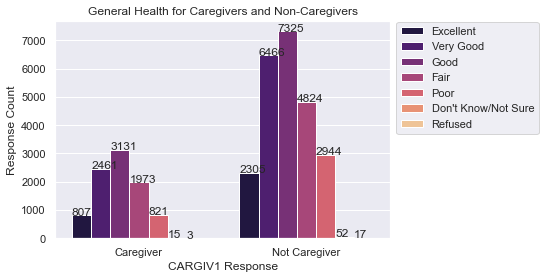

In [187]:
# creating a countplot with seaborn
# I want to see the overall Health of Caregivers vs Non-Caregivers
# I don't want anything fancy, I just want to see the count

countplot = sns.countplot(x = m6['CAREGIV1'], hue = m6['GENHLTH'], palette = 'magma')
countplot.set_xticklabels(['Caregiver', 'Not Caregiver'])
countplot.set(title="General Health for Caregivers and Non-Caregivers")
countplot.set_xlabel('CARGIV1 Response')
countplot.set_ylabel('Response Count')
countplot.legend(bbox_to_anchor=(1.46, 1.02), loc='upper right', labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', "Don't Know/Not Sure", 'Refused'])

# I include the numbers to give a better understanding of the data gaps
# for example, GENHLTH 3 vs 4 for Non-Caregivers is a larger gap than Caregivers

for p in countplot.patches:
    #countplot.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
    countplot.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+1))



In this first visualization, I wanted to determine if the General Health trends for Caregivers and Non-Caregivers was similiar. From this graph, I can see that the two categories do follow a fairly similar trend, with the majority of respondents for both groups reporting largely that they feel "Good", or 3. 

I also noted that very few respondents for both categories reported their General Health as Poor, or 5. 


### Visualization 2: Density Plot of Mental Health related to Caregiver Status

**MENTHLTH Question:**

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many
days during the past 30 days was your mental health not good?

1 - 30 Number of Days

88 None

77 Don't Know/Not Sure

99 Refused

[Text(0.5, 1.0, 'Mental Health for Caregivers and Non-Cargivers')]

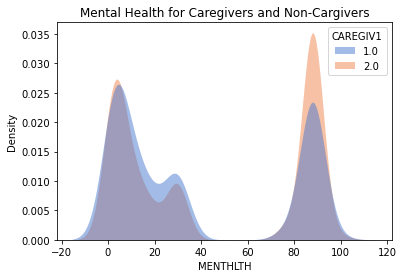

In [19]:
# determining the distribution of the Mental Health responses
# broken out by Caregiver status
# 1 = Caregiver and 2 = Non-Caregiver

KDEplot = sns.kdeplot(data=m6, x=m6['MENTHLTH'], hue=m6['CAREGIV1'], 
                      fill=True, common_norm=False, palette="muted",
                      alpha=0.5, linewidth=0)

KDEplot.set(title="Mental Health for Caregivers and Non-Cargivers")


For this plot, I chose to not set a common normalization and normalized the data before plotting it. I felt this would give me a better idea of the relationship between Caregiver/Non-Caregiver Mental Health. 

From this graph, I can see that mental health for both categories followed the same trends. However, Caregivers had less ups and downs from days 10 to 25 and had a more steady downward trend.

### Visualization 3: Density Plot of Physical Health related to Caregiver Status

**PHYSHLTH Question:**

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past
30 days was your physical health not good?

1 - 30 Number of Days

88 None

77 Don't Know/Not Sure

99 Refused

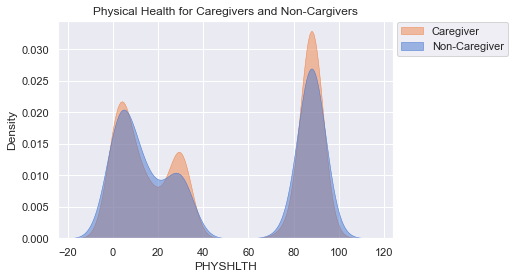

In [126]:
# determining the distribution of the Physical Health responses
# broken out by Caregiver status
# 1 = Caregiver and 2 = Non-Caregiver

KDEplot2 = sns.kdeplot(data=m6, x=m6['PHYSHLTH'], hue=m6['CAREGIV1'], 
                      fill=True, common_norm=False, palette='muted',
                      alpha=0.5, linewidth=0.5, legend=False)

KDEplot2.set(title="Physical Health for Caregivers and Non-Cargivers")
KDEplot2.legend(labels=['Caregiver', 'Non-Caregiver'], bbox_to_anchor=(1.36, 1.02), loc='upper right')



Once again, I chose to normalize the data prior to graphing it. The Caregiver data follows the same trends as the Non-Caregivers, however it is not as sharp. 


### Visualization 4: Mental Health as Related to Cargiver Status & Sex

**MENTHLTH Question:**

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many
days during the past 30 days was your mental health not good?

In [21]:
# the BRFSS codebook reports the responses to the MENTHLTH column
# 77, 88, & 99 are not needed for this examination

m6 = m6.drop(m6[(m6['MENTHLTH']==77) | 
                (m6['MENTHLTH']==88) | 
                (m6['MENTHLTH']==99)].index)

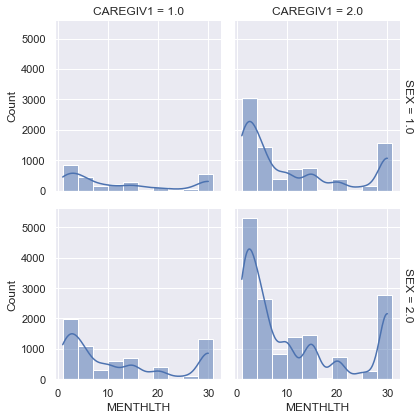

In [22]:
# creating a displot for mental health vs CARGIVING status
# I also broke this graph out by sex to determine if that plays any role

sns.set_theme(style='darkgrid')

displot = sns.displot(m6, x=m6["MENTHLTH"], col=m6["CAREGIV1"], row=m6['SEX'],
           binwidth=3, height=3, facet_kws=dict(margin_titles=True),
           kde=True)


In [23]:
# determining the overall counts of Male vs Female Respondents
# in which Male = 1 and Female = 2

m6['SEX'].value_counts()

2.0    22012
1.0    11132
Name: SEX, dtype: int64

In this graph, I examined the Mental Health breakout of Caregiver vs Non-Caregiver with Sex as well. I wanted to see if there was a significant breakout between male and female respondents. While there were more female respondents, the trends in the data were largely the same. From this data, I don't believe this breakout is worth chasing after. 

### Visualization 5: Mental Health as Related to Longevity of Caregiving

**CRGVLNG1 Question:**

For how long have you provided care for that person? Would you say...

1 - Less than 30 Days

2 - 1 month to less than 6 months

3 - 6 months to less than 2 years

4 - 2 years to less than 5 years

5 - More than 5 years

7 -  Don't Know/Not sure

9 - Refused

[Text(0.5, 1.0, 'Mental Health as Related to Longevity of Caregiving')]

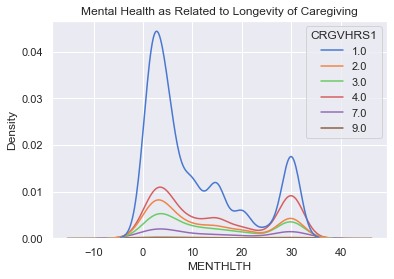

In [127]:
# I chose to normalize the data with a commonality versus separately
# this cleaned up the output and allowed for better readability of the graph

kdeplot3 = sns.kdeplot(data=m6, x=m6['MENTHLTH'], hue=m6['CRGVHRS1'], common_norm=True, palette='muted')

kdeplot3.set(title="Mental Health as Related to Longevity of Caregiving")

I found this graph to be the most informative. This graph displays the relationship between mental health and the lenght of caregiving provided. 

From this, I can see that for each category of the longevity of care, most struggled wtih mental health for 0 - 10 days out of the month. Those taking care of their caregiving reciepient for more than 5 years (5) struggled the most with mental health 30 days out of the month, with those at the 2-5 year mark (4) following closely behind. 

What I found interesting is that at x-tick 30, the graph almost follows the time of caregivers spent providing care. However, CRGVLNG1 marks 1 and 2 are transposed, with Caregivers at mark 2 reporting less trouble than those at mark 1. It may be that those at mark 1 are struggling with learning their new responsiblities as a caregiver, and are therefore at a heightened state of stress every day. 

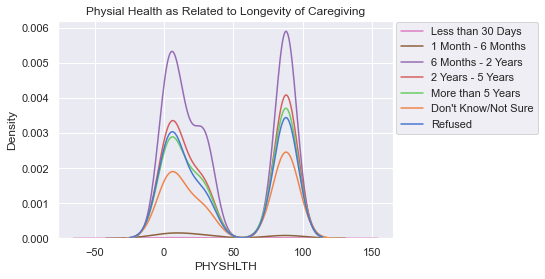

In [139]:
# creating a kde plot for Physical health vs the Length of Caregiving provided thus far
# I want to see if the longer a caregiver provides care, the worse their health gets physically

kdeplot4 = sns.kdeplot(data=m6, x=m6['PHYSHLTH'], hue=m6['CRGVLNG1'], common_norm=True, palette='muted')

kdeplot4.set(title="Physial Health as Related to Longevity of Caregiving")
kdeplot4.legend(bbox_to_anchor=(1.45, 1.02), loc='upper right', 
                labels=['Less than 30 Days', '1 Month - 6 Months',
                       '6 Months - 2 Years', '2 Years - 5 Years',
                       'More than 5 Years', "Don't Know/Not Sure", 'Refused'])

For this graph, I observed that those providing care longer than 5 years reported the highest amount of Physical Health issues, followed closely by those just beginning their care. 

For the longer caregivers, this may be due to their body finally feeling the affects of the continued care they must provide. For those in the initial stages, again, this may be due to the heightened state of stress as they figure out their new roles.

### Milestone 1 - Conclusion

From viewing the data, I can see that the longer level of care provided by Caregivers, the worse their reported mental and phsyical health gets. This is only wrong on one account, the Caregivers first starting their care. This can most likely be explained by the heighted levels of stress when learning how to care for their new patient. However, it still stands, the longer the care continues, the worse the health of caregiver. 

Comparing Caregivers to Non-Caregivers shows that while the trends of Mental and Physical health are relatively the same, Caregivers trends are less sharp. This leads me to the conclusion that while they do suffer similarly, Caregivers are more worn down across the spectrum than Non-Caregivers.

# Milestone 2

This project address the health issues of home caregivers. In 2017, the Texa In-Home and Family Support program was terminated for lack of funding. Medicaid often does not cover the cost of the level of care needed by many caregiving recipients. While the program has worked to expand home based care coverage, the coverage is often optional for states. For states not opted in, this leaves many caregivers in a bind, stuck with covering medical costs of their caregiving recipient as well as providing for their own families. This results in higher levels of burnout in caregivers and negatively impacts their health. This in-turn taxes the medical system as care must be provided to the caregiver. 

As the Baby Boomer generation ages, the need for addressing home health caregiving must be answered. The second largest generation is heading into a state of needing care provided on a regular basis as they age. If the proper care system is not set up, this generation and the others after them will hurt. While the need for support to caregivers was re-addressed at the national level in the 2021 American Rescue Plan, futher aid must be mapped out. This project aims to show the worsening health of caregivers the longer their care progresses as a means to establish the need for caregiver support, not just to aid the caregiving recipient, but to ensure the caregiver is provided sufficient aid. This project is pertinent to both federal and state governments for them to understand what the current lack of sufficient aid is doing to their citizens.

In [26]:
# importing the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In Milestone 1, I performed some initial removal of variables I identified as not useful for future model buidling. I also dropped missing values for my initial EDA. I will build upon these actions and create new variables for the cleaned data. 

### Dropping unneeded variables

In [27]:
# dropping unneeded columns 

n1 = m1.drop(['IDATE','IMONTH','IDAY','IYEAR', # this data contains date/time information not needed for this analysis
             'DISPCODE','SEQNO','_PSU','CTELENUM','PVTRESD1','COLGHOUS','STATERES', # this data contained contact information about the interviewee
             'CELLFON3','LADULT','NUMADULT','NUMMEN','NUMWOMEN','CTELNUM1','CELLFON2','CADULT','PVTRESD2', # this dtat contained more contact information
             'CCLGHOUS','CSTATE','LANDLINE', # this data contained additional information about contact information
             'HHADULT','CHECKUP1','BLOODCHO', # this data was not needed for the analysis
             'BPMEDS','CHOLCHK','ASTHNOW','DIABAGE2', # this data asked questions about medication usuage
             'EDUCA','RENTHOM1','NUMHHOL2','NUMPHON2','CPDEMO1', # this data contained generic info about the interviewee
             'CHILDREN','INTERNET','SMOKE100', # this information was not needed for this analysis
             'STOPSMK2','LASTSMK2','USENOW3','AVEDRNK2','DRNK3GE5','MAXDRNKS', # this data was related to smoking and alcohol habits
             'FRUITJU1','FRUIT1','FVBEANS','FVGREEN','FVORANG','VEGETAB1', # this data pertained to eating habits; not needed
             'EXRACT11','EXEROFT1','EXRACT21','EXERHMM1', # this data pertained to exercise habits; not needed
             'ARTHDIS2','ARTHSOCL','JOINPAIN','SEATBELT', # this data pertained to arthritis; not needed -- seatbelt info not needed
             'FLUSHOT6','FLSHTMY2','IMFVPLAC','PNEUVAC3','HIVTST6','HIVTSTD3', # vaccination status not needed for this analysis
             'WHRTST10','PDIABTST','BLDSUGAR', # specific diabetes information not needed for this analysis
             'FEETCHK2','CHKHEMO3','FEETCHK', # feet checkup information not needed for this analysis
             'EYEEXAM','DIABEYE','DIABEDU', # additional diabetes information not needed for this analysis
             'PAINACT2','QLMENTL2','QLSTRES2','QLHLTH2','CRGVEXPT', # mental status not needed due to MENTHLTH variable
             'VIDFCLT2','VIREDIF3','VIPRFVS2','VINOCRE2','VIEYEXM2','VIINSUR2','VICTRCT4','VIGLUMA2', # visual data not needed
             'CDHELP','CDSOCIAL','CDDISCUS', # cognitive decline data not needed for this analysis
             'WTCHSALT','LONGWTCH', # sodium intake data not needed for this analysis
             'ASTHMAGE','ASERVIST','ASDRVIST','ASRCHKUP','ASACTLIM','ASYMPTOM','ASNOSLEP','ASTHMED3','ASINHALR','ASATTACK', # asthma data not needed for this analysis
             'HAREHAB1','STREHAB1','CVDASPRN','ASPUNSAF','RLIVPAIN','RDUCHART','RDUCSTRK', # heart attack information not needed
             'ARTTODAY','ARTHWGT','ARTHEXER','ARTHEDU','LMTJOIN3','STRENGTH', # additional arthritis data not needed
             'TETANUS','HPVADVC2','HPVADSHT','SHINGLE2', # additional vaccination data not needed
             'HADMAM','HOWLONG','HADPAP2','LASTPAP2','HPVTEST','HPLSTTST','HADHYST2','PROFEXAM','LENGEXAM','TOLDHI2', 'PREGNANT', # female health specific data not needed for this analysis
             'BLDSTOOL','LSTBLDS3','HADSIGM3','HADSGCO1','LASTSIG3', # colonoscopy data not needed for this analysis
             'PCPSAAD2','PCPSADI1','PCPSARE1','PSATEST1','PSATIME','PCPSARS1','PCPSADE1','PCDMDECN', # prostate data not needed for this analysis
             'SCNTMNY1','SCNTMEL1','SCNTPAID','SCNTWRK1','SCNTLPAD','SCNTLWK1', # social context data not needed for this analysis
             'SXORIENT','TRNSGNDR', # sexual oritentation and identity not needed for this analysis
             'RCSGENDR','RCSRLTN2','CASTHDX2','CASTHNO2', # child information not needed for this analysis
             'ADPLEASR','ADDOWN','ADSLEEP','ADENERGY','ADEAT1','ADFAIL','ADTHINK','ADMOVE','MISTMNT','ADANXEV', # anxiety and depression information not needed due to MENTHLTH variable
             'QSTVER','QSTLANG', # questionnaire information not needed or beneficial to this analysis
             'EXACTOT1','EXACTOT2','EXERANY2', 'EXEROFT2','EXERHMM2', # additional exercise information not needed for this analysis
             'MSCODE', # metropolitan information not needed for this analysis
             '_STSTR','_STRWT','_RAWRAKE', '_WT2RAKE', # information hidden from the csv; data is unusable
             '_CHISPNC','_CRACE1','_CPRACE','_CLLCPWT', # race information not needed for this analysis
             '_DUALUSE','_DUALCOR','_LLCPWT','_RFHLTH', # information hidden from the csv; data is unusable
             '_HCVU651','_RFHYPE5','_CHOLCHK','_RFCHOL','_MICHD','_LTASTH1','_CASTHM1','_ASTHMS1','_DRDXAR1', # weighted variable information not needed
             '_MRACE1','_HISPANC','_RACE','_RACEG21','_RACEGR3','_RACE_G1', # race information not needed for this analysis
             '_AGE65YR','_AGE80','_AGE_G', # these age brackets information not needed for this analysis
             'HTIN4','HTM4','WTKG3','_BMI5','_BMI5CAT','_RFBMI5','HEIGHT3', 'WEIGHT2', # height/weight information not pertinent to this analysis
             '_CHLDCNT', # child count information not needed
             '_EDUCAG','_INCOMG', # education and income information not needed for this analysis
             '_SMOKER3','_RFSMOK3','DRNKANY5','DROCDY3_','_RFBING5','_DRNKWEK','_RFDRHV5','SMOKDAY2', # additional smoke and alcohol habits not needed
             'FTJUDA1_','FRUTDA1_','BEANDAY_','GRENDAY_','ORNGDAY_','VEGEDA1_','_MISFRTN','_MISVEGN','_FRTRESP', # additional fruit/vegetable information not needed
             '_VEGRESP','_FRUTSUM','_VEGESUM','_FRTLT1','_VEGLT1','_FRT16','_VEG23','_FRUITEX','_VEGETEX', # additional fruit/vegetable information not needed
             '_TOTINDA','METVL11_','METVL21_','MAXVO2_','FC60_','ACTIN11_','ACTIN21_','PADUR1_','PADUR2_', # physical activity information not needed
             'PAFREQ1_','PAFREQ2_','_MINAC11','_MINAC21','STRFREQ_','PAMISS1_','PAMIN11_','PAMIN21_','PA1MIN_', # physical activity information not needed
             'PAVIG11_','PAVIG21_','PA1VIGM_','_PACAT1','_PAINDX1','_PA150R2','_PA300R2','_PA30021','_PASTRNG','_PAREC1','_PASTAE1',  # physical activity information not needed
             '_LMTACT1','_LMTWRK1', # arthritis information not needed
             '_LMTSCL1','_RFSEAT2','_RFSEAT3', # social activity and seatbelt habits not needed
             '_FLSHOT6','_PNEUMO2','_AIDTST3', # vacination information not needed
             'CRGVREL1', # relation to caregiver not needed
             'CRGVPRB1', # health problem not being focused on; data not needed
             'CRGVPERS', # low response to this variable; data left out
             'CRGVHOUS', # caregiving pertains to household tasks versus medical care; data not being looked at
             '_STATE','FMONTH', # location data not needed
             'PREDIAB1', 'INSULIN', 'DOCTDIAB', # diabetes information not needed
             'VIMACDG2', 'CIMEMLOS', 'HLTHPLN1', # additional cognitive decline, healthcare, and visual status not needed
             'CDHOUSE', 'CDASSIST', 'DRADVISE', # additional cognitive decline not needed
             'EMTSUPRT', 'LSATISFY', # emotional and life satisifaction determined to not be needed due to MENTHTLH variable 
             'PERSDOC2', 'MEDCOST', # medical care information not needed
             'MARITAL','BLIND', # marital staus and visual satus not needed
             'DIFFWALK', 'DIFFDRES', 'DIFFALON', #difficulty encountered when walking/dressing/alone not needed
             'POORHLTH', '_AGEG5YR', '_PRACE1', 'VETERAN3' # determined to be unneeded given the GENHLTH column
             ], axis=1, inplace=False)

### Chosen Variables

1. GENHLTH - The target variable for this analysis.

2. PHYSHLTH - Discusses number of days respondent's phyiscal health was not good in the past 30 days.

3. MENTHLTH - Discusses number of days respondent's mental health was not good over the past 30 days.

4. BPHIGH4 - Discusses whether respondent has been told by health professional about if they have high blood pressure.

5. CVDINFR4 - Chronic Health Condition Category; Heart Attack confirmation

6. CVDCRHD4 - Chronic Health Condition Category; Angina or Coronary Heart Disease confirmation

7. CVDSTRK3 - Chronic Health Condition Category; Stroke confirmation

8. ASTHMA3 - Chronic Health Condition Category; Asthma confirmation

9. CHCSCNCR - Chronic Health Condition Category; Skin Cancer confirmation

10. CHCOCNCR - Chronic Health Condition Category; Generic Cancer confirmation

11. CHCCOPD1 - Chronic Health Condition Category;Chronic Obstructive Pulmonary Disease (COPD) confirmation

12. HAVARTH3 - Chronic Health Condition Category; Generic Arthritis confirmation

13. ADDEPEV2 - Chronic Health Condition Category; Depressive Disorder confirmation

14. CHCKIDNY - Chronic Health Condition Category; Kidney Disease confirmation

15. DIABETE3 - Chronic Health Condition Category; Diabetes confirmation

16. SEX - Respondent Sex

18. EMPLOY1 - Employment Status of Respondent

19. INCOME2 - Income status of Respondent

20. QLACTLM2 - Indicate if respondent is limited by physical, mental, or emotional problems

21. USEEQUIP - Indicate if respondent uses special equipment (cane, wheelchair, etc.)

22. DECIDE - Indicate if respondent has difficulty making decisions due to mental, emotional or physical issues

23. ALCDAY5 - How many days respondent has had alcohol in past 30 days

24. CAREGIV1 - If respondent provides regular care or assistance to friend or family member

25. CRGVLNG1 - How long respondent has cared for that individual in length of days/months/years

26. CRGVHRS1 - How long respondent has cared for that individual in length of hours/week

27. CRGVMST2 - What the caregiver needs support-wise that they are not receiving


### Checking for null values

Checking for null values in the chosen values. As the data pertains to each individual's specific health care problems or situations, I do not feel comfortable filling in the missing data with the mode or median value of each column. As such, for each missing value, I will drop the missing values. 

There is one exception though. I will replace the missing values for the Income2 variable.

In [28]:
n1.isnull().sum()

GENHLTH          2
PHYSHLTH         1
MENTHLTH         0
BPHIGH4          1
CVDINFR4         0
CVDCRHD4         1
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         1
CHCOCNCR         0
CHCCOPD1         0
HAVARTH3         1
ADDEPEV2         0
CHCKIDNY         0
DIABETE3         7
SEX              0
EMPLOY1          0
INCOME2       3301
QLACTLM2      9338
USEEQUIP     10430
DECIDE       11740
ALCDAY5      15931
CAREGIV1    332461
CRGVLNG1    417461
CRGVHRS1    417493
CRGVMST2    417634
dtype: int64

In [29]:
# replacing the missing values for INCOME2 with the mode value

INCOME2_Mode = n1['INCOME2'].mode()

n1['INCOME2'] = n1['INCOME2'].replace(np.nan, INCOME2_Mode[0])

In [30]:
# ensuring the values were replaced correctly 

n1['INCOME2'].isnull().sum()

0

In [31]:
n1.isnull().sum()

GENHLTH          2
PHYSHLTH         1
MENTHLTH         0
BPHIGH4          1
CVDINFR4         0
CVDCRHD4         1
CVDSTRK3         0
ASTHMA3          0
CHCSCNCR         1
CHCOCNCR         0
CHCCOPD1         0
HAVARTH3         1
ADDEPEV2         0
CHCKIDNY         0
DIABETE3         7
SEX              0
EMPLOY1          0
INCOME2          0
QLACTLM2      9338
USEEQUIP     10430
DECIDE       11740
ALCDAY5      15931
CAREGIV1    332461
CRGVLNG1    417461
CRGVHRS1    417493
CRGVMST2    417634
dtype: int64

Next, I will drop the columns that I cannot fill in with the mode. 

In [32]:
# dropping the rows from the majority of variables that have missing values

n2 = n1.dropna(axis=0, subset=['GENHLTH', 'PHYSHLTH', 'BPHIGH4', 'CVDCRHD4',
                              'CHCSCNCR', 'HAVARTH3', 'DIABETE3',
                              'QLACTLM2', 'USEEQUIP', 'DECIDE', 'ALCDAY5',
                              'CAREGIV1', 'CRGVLNG1', 'CRGVHRS1', 'CRGVMST2'])

In [33]:
n2.isnull().sum()

GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
BPHIGH4     0
CVDINFR4    0
CVDCRHD4    0
CVDSTRK3    0
ASTHMA3     0
CHCSCNCR    0
CHCOCNCR    0
CHCCOPD1    0
HAVARTH3    0
ADDEPEV2    0
CHCKIDNY    0
DIABETE3    0
SEX         0
EMPLOY1     0
INCOME2     0
QLACTLM2    0
USEEQUIP    0
DECIDE      0
ALCDAY5     0
CAREGIV1    0
CRGVLNG1    0
CRGVHRS1    0
CRGVMST2    0
dtype: int64

Because I have dropped the missing values from CRGVLNG1, CRGVLNG1, CRGVHRS1, and CRGVMST2, the remaining data will pertain only to the respondents that indicated they were caregivers. 

However, as I am concerned with an individual's health based on the level of care they provide to another individual, I am fine with this. I will need to focus on the respondents that are caregivers, broken out by the degree to which the provide their care. Additionally, the EDA performed in Milestone 1 showed that there were similar trends in health between caregivers and non-caregivers. As such, futher analysis as it relates to this project is not needed.

### Fixing Structural Errors - Column Names

In [34]:
# reassigning the column names to desired names
# placing these in a dictionary for ease of use

dictionary = {'GENHLTH':'GENHLTH', 'PHYSHLTH':'PHYSHLTH', 'MENTHLTH':'MENTHLTH', 'BPHIGH4':'HIGHBP',
       'CVDINFR4':'HEARTATTACK', 'CVDCRHD4':'ANGINA', 'CVDSTRK3':'STROKE', 'ASTHMA3':'ASTHMA',
       'CHCSCNCR':'SKINCANCER', 'CHCOCNCR':'CANCER', 'CHCCOPD1':'COPD', 'HAVARTH3':'ARTHRITIS', 'ADDEPEV2':'DEPRESSIVEDISORDER',
       'CHCKIDNY':'KIDNEYDISEASE', 'DIABETE3':'DIABETES', 'SEX':'SEX',
       'EMPLOY1':'EMPLOYMENT', 'INCOME2':'INCOME', 'QLACTLM2':'LIMITEDACTIVITY',
       'USEEQUIP':'USEEQUIP', 'DECIDE':'DECIDE', 'ALCDAY5':'ALCOHOLCONSUMED', 'CAREGIV1':'CAREGIVER',
       'CRGVLNG1':'CRGVLENGTH', 'CRGVHRS1':'CRGVHOURS', 'CRGVMST2':'CRGVSUPPORT'}

In [35]:
# renaming the columns from the dataframe n2 and assigning the new columns/data to n3

n3 = n2.rename(columns=dictionary, inplace=False)
n3.head()

,GENHLTH,PHYSHLTH,MENTHLTH,HIGHBP,HEARTATTACK,ANGINA,STROKE,ASTHMA,SKINCANCER,CANCER,...,EMPLOYMENT,INCOME,LIMITEDACTIVITY,USEEQUIP,DECIDE,ALCOHOLCONSUMED,CAREGIVER,CRGVLENGTH,CRGVHOURS,CRGVSUPPORT
15,3.0,88.0,88.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,5.0,4.0,1.0,2.0,2.0,202.0,1.0,4.0,2.0,6.0
24,5.0,99.0,99.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,9.0,3.0,1.0,1.0,2.0,888.0,1.0,4.0,4.0,2.0
27,4.0,30.0,5.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,...,8.0,2.0,1.0,2.0,1.0,888.0,1.0,5.0,4.0,6.0
34,4.0,28.0,30.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,...,8.0,2.0,1.0,2.0,1.0,888.0,1.0,1.0,1.0,6.0
37,2.0,88.0,88.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,6.0,2.0,2.0,2.0,215.0,1.0,5.0,4.0,6.0


### Splitting the Categorical Columns into Dummy Variables

I will not be changing the PHYSHLTH, MENTHLTH, AND ALCDAY5 columns into dummy variables. These columns are numerical.

I will also not be splitting my target variable GENHLTH.

In [36]:
# creating dummy variables from the categorical columns

n4 = pd.get_dummies(n3, columns=['HIGHBP', 'HEARTATTACK', 'ANGINA', 'STROKE',
                                'ASTHMA', 'SKINCANCER', 'CANCER', 'COPD', 'ARTHRITIS', 
                                'DEPRESSIVEDISORDER', 'KIDNEYDISEASE', 'DIABETES', 'SEX','EMPLOYMENT', 'INCOME', 'LIMITEDACTIVITY',
                                'USEEQUIP', 'DECIDE', 'ALCOHOLCONSUMED', 'CAREGIVER', 
                                'CRGVLENGTH', 'CRGVHOURS', 'CRGVSUPPORT'])

In [37]:
n4.head()

,GENHLTH,PHYSHLTH,MENTHLTH,HIGHBP_1.0,HIGHBP_2.0,HIGHBP_3.0,HIGHBP_4.0,HIGHBP_7.0,HIGHBP_9.0,HEARTATTACK_1.0,...,CRGVHOURS_7.0,CRGVHOURS_9.0,CRGVSUPPORT_1.0,CRGVSUPPORT_2.0,CRGVSUPPORT_3.0,CRGVSUPPORT_4.0,CRGVSUPPORT_5.0,CRGVSUPPORT_6.0,CRGVSUPPORT_7.0,CRGVSUPPORT_9.0
15,3.0,88.0,88.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,5.0,99.0,99.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
27,4.0,30.0,5.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,4.0,28.0,30.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37,2.0,88.0,88.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Fixing Structural Errors - Removing Irrelevant Data

I will be removing certain rows based on their values. From PHYSHLTH, I will be removing rows that contain the values of 77 and 99 as these values relate to a respondent answer of "Don't know/Not sure" and "Refused", respectively. 

Additionally, I will be removing the same values from the MENTHLTH column as well. 

In [38]:
n5 = n4[n4['PHYSHLTH'] != 77]
n5 = n4[n4['PHYSHLTH'] != 99]
n5 = n4[n4['MENTHLTH'] != 77]
n5 = n4[n4['MENTHLTH'] != 99]
n5.head(5)

,GENHLTH,PHYSHLTH,MENTHLTH,HIGHBP_1.0,HIGHBP_2.0,HIGHBP_3.0,HIGHBP_4.0,HIGHBP_7.0,HIGHBP_9.0,HEARTATTACK_1.0,...,CRGVHOURS_7.0,CRGVHOURS_9.0,CRGVSUPPORT_1.0,CRGVSUPPORT_2.0,CRGVSUPPORT_3.0,CRGVSUPPORT_4.0,CRGVSUPPORT_5.0,CRGVSUPPORT_6.0,CRGVSUPPORT_7.0,CRGVSUPPORT_9.0
15,3.0,88.0,88.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27,4.0,30.0,5.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,4.0,28.0,30.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37,2.0,88.0,88.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41,3.0,88.0,88.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the data into Target and Feature Data

In [39]:
# creating my target variable

target1 = n5['GENHLTH']

In [40]:
# creating the features variable

feature = n5.drop('GENHLTH', axis=1, inplace=False)

In [41]:
# splitting the data into train and test sets

feature_train, feature_test, target1_train, target1_test = train_test_split(feature, target1, test_size=0.3)

# Milestone 3

In [59]:
# importing additional libraries for Milestone 2
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

For this milestone, I will select, build, and evaluate a model with an aim to predict the health of an individual based on the longevity of the care they provide. 

For this project, I identified my initial target variables to be the General Health (GENHLTH), Mental Health (MENTHLTH), and Physical Health (PHYSHLTH) variables. However, after working with the data in Milestones 1 and 2, I saw that the MENTHLTH and PHYSHLTH variables were reported as number of days in which the individual had mental or physical health issues. I feel that this data is better suited as a feature rather than a target. I feel that the GENHLTH variable is the sole target variable as it encompasses the totality of the individual's health response. For this reason, I will only use GENHLTH as my target variable. 

For GENHLTH, individuals had the option to report their overall health status as 1 of 7 options:
1. Excellent
2. Very Good
3. Good
4. Fair
5. Poor
6. Don't know/Not Sure
7. Refused

As can be seen from above, this problem-set is not a binary class classification. This is a multi-class classification problem-set. For this reason, I will not be using algorithms such as Logistic Regression (binary), Linear Regression, or other types of binary class models. 

In [43]:
# n5 is the last dataframe produced from milestone 2
# I am checking to determine what this data frame looks like (entry number, etc.)
n5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23729 entries, 15 to 434379
Columns: 149 entries, GENHLTH to CRGVSUPPORT_9.0
dtypes: float64(3), uint8(146)
memory usage: 4.0 MB


In Milestone 2, I removed the "Don't Know/Not Sure" and "Refused" options from both the MENTHLTH and PHYSHLTH options. I was not interested in keeping data that was useless to me as it did not provide me an overall outlook of the individual's health. I neglected to remove the same options from the GENHLTH variable. I will remove those two options as that was an oversight on my part.

In [44]:
# removing the "Don't Know/Not Sure" and "Refused" responses from the GENHLTH variable
n6 = n5[n5['GENHLTH'] != 7]
n6 = n5[n5['GENHLTH'] != 9]
n6.head()

,GENHLTH,PHYSHLTH,MENTHLTH,HIGHBP_1.0,HIGHBP_2.0,HIGHBP_3.0,HIGHBP_4.0,HIGHBP_7.0,HIGHBP_9.0,HEARTATTACK_1.0,...,CRGVHOURS_7.0,CRGVHOURS_9.0,CRGVSUPPORT_1.0,CRGVSUPPORT_2.0,CRGVSUPPORT_3.0,CRGVSUPPORT_4.0,CRGVSUPPORT_5.0,CRGVSUPPORT_6.0,CRGVSUPPORT_7.0,CRGVSUPPORT_9.0
15,3.0,88.0,88.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27,4.0,30.0,5.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,4.0,28.0,30.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37,2.0,88.0,88.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41,3.0,88.0,88.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


As I performed the feature scaling and target/feature data creation with the old dataframe, I will repeat the steps with the new dataframe, n6.

In [45]:
# creating my target variable

target_6 = n6['GENHLTH']

In [46]:
# creating the features variable

feature_6 = n6.drop('GENHLTH', axis=1, inplace=False)

In [47]:
# splitting the data into train and test sets

feature_train6, feature_test6, target_train6, target_test6 = train_test_split(feature_6, target_6, test_size=0.3)

### Creating a KNN Model

In [153]:
n6.shape

(23717, 149)

Now that I have split the data based on changes I needed to make. I am going to fit the data to a model.  As I am working to predict a categorical variable (GENHLTH) and the data is labeled, I will push to use K-Nearest Neighbor as my model. 

In [173]:
# creating the KNN classifier 
# fitting the model to the data
model_KNN = KNeighborsClassifier(n_neighbors=154, n_jobs=-1).fit(feature_train6, target_train6)

### Evaluating KNN with sklearn.metrics Accuracy Score

In [174]:
# checking the accuracy of the model
AccuracyKNN = accuracy_score(target_test6, model_KNN.predict(feature_test6))
print(f"KNN Accuracy:", "{:.2f}".format(AccuracyKNN))

KNN Accuracy: 0.42


The KNN model was determined to only be 42% accurate when predicting the General Health of an individual based on the features examined for this data. From this, I'll need to see if tuning the hyperparameter of the KNN model will increase the accuracy score.

### Evaluating KNN with sklearn.metrics Classification Report

In [161]:
# calculating the predict data
predicted_KNN = model_KNN.predict(feature_test6)

In [162]:
# pulling the classification report for KNN
report_KNN = classification_report(target_test6, predicted_KNN)

C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
print(report_KNN)

              precision    recall  f1-score   support

         1.0       0.34      0.16      0.22       986
         2.0       0.41      0.65      0.50      2220
         3.0       0.43      0.39      0.41      2399
         4.0       0.43      0.30      0.35      1107
         5.0       0.54      0.25      0.34       392
         7.0       0.00      0.00      0.00        12

    accuracy                           0.42      7116
   macro avg       0.36      0.29      0.31      7116
weighted avg       0.42      0.42      0.40      7116



### Creating a second KNN model with adjusted hyperparameters

In [171]:
# in this model, I adjust the n_neighbors parameter to 10 and fix the default leaf_size to a list of range 1,10
model_KNN_2 = KNeighborsClassifier(n_neighbors=70, leaf_size=list(range(1,100)), n_jobs=-1).fit(feature_train6, target_train6)

### Evaluating KNN_2 with sklearn.metrics Accuracy Score

In [172]:
# checking the accuracy of the model
AccuracyKNN_2 = accuracy_score(target_test6, model_KNN_2.predict(feature_test6))
print(f"KNN Accuracy:", "{:.2f}".format(AccuracyKNN_2))

KNN Accuracy: 0.42


Despite adjusting a few of the hyperparameters for the second KNN model, the accuracy score is still very low with a value of 42%. 

### Evaluating KNN_2 with sklearn.metrics Classification Report

In [168]:
# calculating the predict data
predicted_KNN_2 = model_KNN_2.predict(feature_test6)

In [169]:
# pulling the classification report for KNN
report_KNN_2 = classification_report(target_test6, predicted_KNN_2)

C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
print(report_KNN_2)

              precision    recall  f1-score   support

         1.0       0.34      0.16      0.22       986
         2.0       0.41      0.65      0.50      2220
         3.0       0.43      0.39      0.41      2399
         4.0       0.43      0.30      0.35      1107
         5.0       0.54      0.25      0.34       392
         7.0       0.00      0.00      0.00        12

    accuracy                           0.42      7116
   macro avg       0.36      0.29      0.31      7116
weighted avg       0.42      0.42      0.40      7116



### Creating a Decision Tree Model

As the KNN Models gave low predictions, I will attempt to produce better results using the Decision Tree classifier. I am doing this as the Decision Tree classifier is another method that can be used for a multi-class model. 

In [181]:
# creating the decisiontree classifier
decisiontree = DecisionTreeClassifier(random_state=42)

In [182]:
# fitting the decision tree classifier to the data
model_DT = decisiontree.fit(feature_train6, target_train6)

### Evaluating the DT with sklearn.metrics Accuracy Score

In [183]:
# checking the accuracy of the model
AccuracyDT = accuracy_score(target_test6, model_DT.predict(feature_test6))
print(f"DT Accuracy:", "{:.2f}".format(AccuracyDT))

DT Accuracy: 0.36


This model produced an accuracy of 36%, one percent less than the KNN model. 

### Evaulating the DT with sklearn.metrics Classification Report

In [178]:
# calculating the predict data
predicted_DT = model_DT.predict(feature_test6)

In [179]:
# pulling the classification report for DT
report_DT = classification_report(target_test6, predicted_DT)

In [180]:
print(report_DT)

              precision    recall  f1-score   support

         1.0       0.26      0.27      0.26       986
         2.0       0.38      0.39      0.38      2220
         3.0       0.40      0.40      0.40      2399
         4.0       0.34      0.31      0.33      1107
         5.0       0.36      0.34      0.35       392
         7.0       0.00      0.00      0.00        12

    accuracy                           0.36      7116
   macro avg       0.29      0.29      0.29      7116
weighted avg       0.36      0.36      0.36      7116



### Creating a Random Forest Model

Finally, as both the KNN and Decision Tree models failed to produce accuracy scores indicative of a good model, I will turn to the Random Forest classifier. I am expecting this model to produce a better accuracy score as it is more robust and accurate than the decision tree classifier. However, due to both the KNN and Decision Tree models producing low accuracy scores, I am not expecting a score higher than 55%. 

In [56]:
# creating the Random Forest Classifer
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [57]:
# fitting the data to the model
model_RF = randomforest.fit(feature_train6, target_train6)

### Evaluating the RF with sklearn.metrics Accuracy Score

In [58]:
# checking the accuracy of the model
AccuracyRF = accuracy_score(target_test6, model_RF.predict(feature_test6))
print(f"RF Accuracy:", "{:.2f}".format(AccuracyRF))

RF Accuracy: 0.42


I was correct in my prediction that the Random Forest classifier would not produce a much better accuracy score. I will summarize why I believe that none of my models produced adequate accuracy scores (>70%) in my conclusion.

### Evaluating the RF with sklearn.metrics Classification Report

In [75]:
# calculating the predict data
predicted_RF = model_RF.predict(feature_test6)

In [76]:
# pulling the classification report for RF
report_RF = classification_report(target_test6, predicted_RF)

C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eadam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print(report_RF)

              precision    recall  f1-score   support

         1.0       0.34      0.19      0.24       986
         2.0       0.41      0.49      0.45      2220
         3.0       0.42      0.52      0.47      2399
         4.0       0.44      0.33      0.38      1107
         5.0       0.55      0.26      0.35       392
         7.0       0.00      0.00      0.00        12

    accuracy                           0.42      7116
   macro avg       0.36      0.30      0.31      7116
weighted avg       0.42      0.42      0.41      7116



As tuning the hyperparameters of the KNN model only increased the value of the accuracy by 3%, I chose to not tune the hyperparameter values of the Decision Tree and Random Forest Models. I do not believe that even with tuning their respective hyperparameters that I could achieve an adequate accuracy score. 

### Milestone 3 - Conclusion

I fit the data to three different models which produced the following accuracy scores:

1. K-Nearest Neighbors: 42% Accuracy
2. K-Nearest Neighbors (Adjusted): 42% Accuracy
2. Decision Tree: 36% Accuracy
3. Random Forest: 42% Accuracy

The continued failure of the models to produce decent accuracy scores leads me to conclude that my hypothesis is incorrect. Caregivers' health is not worse than non-Caregivers. From Milestone 1, I saw that the trends in health for Caregives vs Non-Caregivers were very similiar. Additionally, from Milestone 1, I saw that the trends in reports of health were similar for caregivers at various levels of longevity of care-providing.

All three of these models failed to produce accuracy scores over 70%. I believe this is due to the following:

1. The BRFSS 2015 Survey GENHLTH question relies on a subjective assessment made on the part of the respondent. An article published in Sage Journals reported that individuals often have an unrealistic optimism about their health. This fact is supported by four different respondents (51, 90, 107, 134) who reported their General Health as 'Fair' or 'Good' despite reporting feeling physically or mentally unwell for at least 15 days or more from the past month. One of these respondents reported feeling both physically and mentally unwell for 30 days. 

Dunning, D., Heath, C., & Suls, J. M. (2004). Flawed Self-Assessment: Implications for Health, Education, and the Workplace. Psychological Science in the Public Interest, 5(3), 69–106. https://doi.org/10.1111/j.1529-1006.2004.00018.x

2. Respondents were asked about their General Health prior to being asked questions about whether they have chronic health issues. I believe this sets the respondents up to only think about their recent past health, potentially skewing the data. I would like to find a dataset in which respondents were asked aobut their health both before and after being question about their caregiver status and chronic health issues. I would like to know if their response changes any with this information in their head. 
